<a href="https://colab.research.google.com/github/javiera-ari/javiera./blob/main/Machine_Learning_MP2%2C5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [179]:
import IPython.core.display
import matplotlib ## paquete necesario para poder hacer gráficas

def apply_styles(): ### especificamos los parámetros para los gráficos
    matplotlib.rcParams['font.size'] = 12
    matplotlib.rcParams['figure.figsize'] = (18, 6)
    matplotlib.rcParams['lines.linewidth'] = 1

apply_styles() ### finalmente aplicamos el estilo

In [180]:
### éstos elementos configuran fuente tamaño color de la letra porcentaje etc.
%%html
<style type="text/css">
@import url('https://fonts.googleapis.com/css?family=Playfair+Display');


div.text_cell_render {font-family: 'Playfair Display', serif; color: #13213b; line-height: 145%; font-size:16px;}
</style>

## Parte 1. Examinar los datos

# Sistema de Información Nacional de Calidad del Aire

El mapa presenta de forma predeterminada las estaciones conectadas en línea a SINCA, pudiendo el usuario activar, para presentar en el mapa, aquellas estaciones que no se encuentran en línea, pero que sí pudiesen contar con datos históricos de calidad del aire y meteorología.

# Material particulado respirable
El monitoreo en línea de las concentraciones ambientales de MP10 y MP2,5 se presenta como promedios móviles de 24 horas, basado en el monitoreo continuo de este contaminante.

La información mostrada permite identificar los eventos asociados a situaciones de emergencia ambiental para las últimas 24 horas a partir del momento de consulta.

La información es actualizada cada 1 hora y los registros pueden variar una vez validados operacionalmente por el operador de la estación, los que serán dispuestos en SINCA una vez que éstos sean enviados al Ministerio del Medio Ambiente.

El cálculo del promedio móvil de 24 horas están limitado a un mínimo de datos disponible del 75% (es decir un mínimo de 18 promedios horarios), por lo tanto, de haber menos del 75% de datos, no se calculará el promedio móvil.

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

In [209]:
import warnings ## desactivan los mensajes para ciertos advertencias en las funciones
warnings.filterwarnings('ignore')

# Cargue los datos en Pandas DataFrame

In [223]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns

URL="https://sinca.mma.gob.cl/cgi-bin/APUB-MMA/apub.tsindico2.cgi?outtype=xcl&macro=./RVII/709/Cal/PM25//PM25.horario.horario.ic&from=120707&to=211130&path=/usr/airviro/data/CONAMA/&lang=esp&rsrc=&macropath="


In [224]:
item=['FECHA (YYMMDD)','HORA (HHMM)','Registros validados','Registros preliminares','Registros no validados']
data=pd.read_csv(URL,sep=";",decimal=",",usecols=item)
print(data)
data.head()

       FECHA (YYMMDD)  ...  Registros no validados
0              120707  ...                     NaN
1              120707  ...                     NaN
2              120707  ...                     NaN
3              120707  ...                     NaN
4              120707  ...                     NaN
...               ...  ...                     ...
82410          211130  ...                     NaN
82411          211130  ...                     NaN
82412          211130  ...                     NaN
82413          211130  ...                     NaN
82414          211130  ...                     NaN

[82415 rows x 5 columns]


,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados
0,120707,100,NaN,NaN,NaN
1,120707,200,NaN,NaN,NaN
2,120707,300,NaN,NaN,NaN
3,120707,400,NaN,NaN,NaN
4,120707,500,NaN,NaN,NaN


In [148]:
#data.info()

In [225]:
data['date']=pd.to_datetime(data['FECHA (YYMMDD)'],format="%y%m%d")
data['hour']=pd.to_datetime(data['HORA (HHMM)'].astype(str).str.zfill(4),format="%H%M")
data['hour'] = data['hour'].dt.strftime("%H:%M:%S")
print(data)
data.head()

       FECHA (YYMMDD)  HORA (HHMM)  ...       date      hour
0              120707          100  ... 2012-07-07  01:00:00
1              120707          200  ... 2012-07-07  02:00:00
2              120707          300  ... 2012-07-07  03:00:00
3              120707          400  ... 2012-07-07  04:00:00
4              120707          500  ... 2012-07-07  05:00:00
...               ...          ...  ...        ...       ...
82410          211130         1900  ... 2021-11-30  19:00:00
82411          211130         2000  ... 2021-11-30  20:00:00
82412          211130         2100  ... 2021-11-30  21:00:00
82413          211130         2200  ... 2021-11-30  22:00:00
82414          211130         2300  ... 2021-11-30  23:00:00

[82415 rows x 7 columns]


,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,date,hour
0,120707,100,NaN,NaN,NaN,2012-07-07,01:00:00
1,120707,200,NaN,NaN,NaN,2012-07-07,02:00:00
2,120707,300,NaN,NaN,NaN,2012-07-07,03:00:00
3,120707,400,NaN,NaN,NaN,2012-07-07,04:00:00
4,120707,500,NaN,NaN,NaN,2012-07-07,05:00:00


In [159]:
#data.info()

In [226]:
data['period'] = pd.to_datetime(data.pop('date')) + pd.to_timedelta(data.pop('hour'))
print(data)
data.head(20)

       FECHA (YYMMDD)  HORA (HHMM)  ...  Registros no validados              period
0              120707          100  ...                     NaN 2012-07-07 01:00:00
1              120707          200  ...                     NaN 2012-07-07 02:00:00
2              120707          300  ...                     NaN 2012-07-07 03:00:00
3              120707          400  ...                     NaN 2012-07-07 04:00:00
4              120707          500  ...                     NaN 2012-07-07 05:00:00
...               ...          ...  ...                     ...                 ...
82410          211130         1900  ...                     NaN 2021-11-30 19:00:00
82411          211130         2000  ...                     NaN 2021-11-30 20:00:00
82412          211130         2100  ...                     NaN 2021-11-30 21:00:00
82413          211130         2200  ...                     NaN 2021-11-30 22:00:00
82414          211130         2300  ...                     NaN 2021-11-30 2

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period
0,120707,100,NaN,NaN,NaN,2012-07-07 01:00:00
1,120707,200,NaN,NaN,NaN,2012-07-07 02:00:00
2,120707,300,NaN,NaN,NaN,2012-07-07 03:00:00
3,120707,400,NaN,NaN,NaN,2012-07-07 04:00:00
4,120707,500,NaN,NaN,NaN,2012-07-07 05:00:00
5,120707,600,NaN,NaN,NaN,2012-07-07 06:00:00
6,120707,700,NaN,NaN,NaN,2012-07-07 07:00:00
7,120707,800,NaN,NaN,NaN,2012-07-07 08:00:00
8,120707,900,NaN,NaN,NaN,2012-07-07 09:00:00
9,120707,1000,NaN,NaN,NaN,2012-07-07 10:00:00


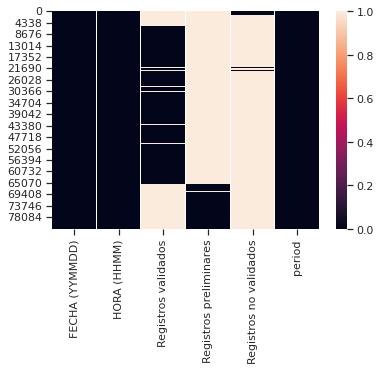

In [227]:
sns.heatmap(data.isnull(), cbar="YlGnBu")

In [229]:
import pandas as pd
import numpy as np
df=pd.DataFrame(data)
df['Registros validados'].fillna(0, inplace = True)
df['Registros preliminares'].fillna(0, inplace = True)
df['Registros no validados'].fillna(0, inplace = True)

df.head(20)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period
0,120707,100,0.0,0.0,0.0000,2012-07-07 01:00:00
1,120707,200,0.0,0.0,0.0000,2012-07-07 02:00:00
2,120707,300,0.0,0.0,0.0000,2012-07-07 03:00:00
3,120707,400,0.0,0.0,0.0000,2012-07-07 04:00:00
4,120707,500,0.0,0.0,0.0000,2012-07-07 05:00:00
5,120707,600,0.0,0.0,0.0000,2012-07-07 06:00:00
6,120707,700,0.0,0.0,0.0000,2012-07-07 07:00:00
7,120707,800,0.0,0.0,0.0000,2012-07-07 08:00:00
8,120707,900,0.0,0.0,0.0000,2012-07-07 09:00:00
9,120707,1000,0.0,0.0,0.0000,2012-07-07 10:00:00


In [221]:
df.shape

(82415, 6)

In [231]:
df['Registros'] = df.iloc[:,2]+df.iloc[:,3]+df.iloc[:,4]
df.head(20)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period,Registros
0,120707,100,0.0,0.0,0.0000,2012-07-07 01:00:00,0.0000
1,120707,200,0.0,0.0,0.0000,2012-07-07 02:00:00,0.0000
2,120707,300,0.0,0.0,0.0000,2012-07-07 03:00:00,0.0000
3,120707,400,0.0,0.0,0.0000,2012-07-07 04:00:00,0.0000
4,120707,500,0.0,0.0,0.0000,2012-07-07 05:00:00,0.0000
5,120707,600,0.0,0.0,0.0000,2012-07-07 06:00:00,0.0000
6,120707,700,0.0,0.0,0.0000,2012-07-07 07:00:00,0.0000
7,120707,800,0.0,0.0,0.0000,2012-07-07 08:00:00,0.0000
8,120707,900,0.0,0.0,0.0000,2012-07-07 09:00:00,0.0000
9,120707,1000,0.0,0.0,0.0000,2012-07-07 10:00:00,0.0000


In [232]:
promedio=df['Registros'].mean()
promedio

29.376455066734103

In [234]:
df.loc[df.Registros<=0,'Registros']=promedio
df.head(20)

,FECHA (YYMMDD),HORA (HHMM),Registros validados,Registros preliminares,Registros no validados,period,Registros
0,120707,100,0.0,0.0,0.0000,2012-07-07 01:00:00,29.376455
1,120707,200,0.0,0.0,0.0000,2012-07-07 02:00:00,29.376455
2,120707,300,0.0,0.0,0.0000,2012-07-07 03:00:00,29.376455
3,120707,400,0.0,0.0,0.0000,2012-07-07 04:00:00,29.376455
4,120707,500,0.0,0.0,0.0000,2012-07-07 05:00:00,29.376455
5,120707,600,0.0,0.0,0.0000,2012-07-07 06:00:00,29.376455
6,120707,700,0.0,0.0,0.0000,2012-07-07 07:00:00,29.376455
7,120707,800,0.0,0.0,0.0000,2012-07-07 08:00:00,29.376455
8,120707,900,0.0,0.0,0.0000,2012-07-07 09:00:00,29.376455
9,120707,1000,0.0,0.0,0.0000,2012-07-07 10:00:00,29.376455


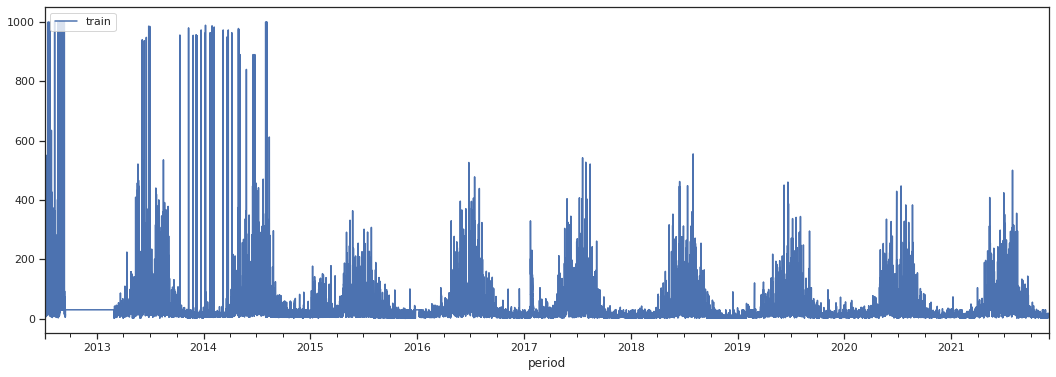

In [236]:
import matplotlib.pyplot as mplt
import seaborn as sbn
fig, ax = plt.subplots(figsize=(18,6))
df.plot(x="period", y="Registros", ax=ax, label="train")

plt.legend(loc='upper left')

plt.savefig('images/prophet-forecast-testrange.png')
plt.show();

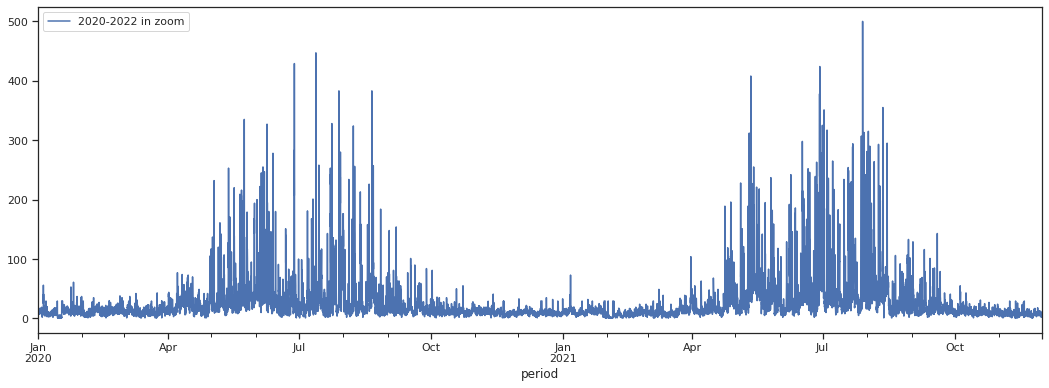

In [239]:
# hacemos una sección de los datos para analizar de cerca lo que pasa en dos años
zoom_range = df[(df.period >= '2020-01-01') & (df.period < '2022-01-01')].index

fig, ax = plt.subplots(figsize=(18,6)) # dimensiones del gráfico
df.loc[zoom_range].plot(x="period", y="Registros", ax=ax, label="2020-2022 in zoom") ## el gráfico en sí pero considerando el zoom de datos
plt.legend(loc='upper left') # cambiamos la posición por defecto de la leyenda

plt.savefig('images/intro-zoom.png'); ## recuerda crear la carpeta 'images'

## Parte 2.

In [241]:
#Del paquete statmodel se obtiene un modelo para hacer descomposición de estacionalidad 
#explicar el paquete "statsmodels"
from statsmodels.tsa.seasonal import seasonal_decompose

decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("period").Registros.interpolate("linear"),
    freq=decompfreq,
    model=model)

In [242]:
## aquí obtenemos los resultados de la descomposición, en términos de tendencia, estacionalidad y residuos
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid 

# The Trend

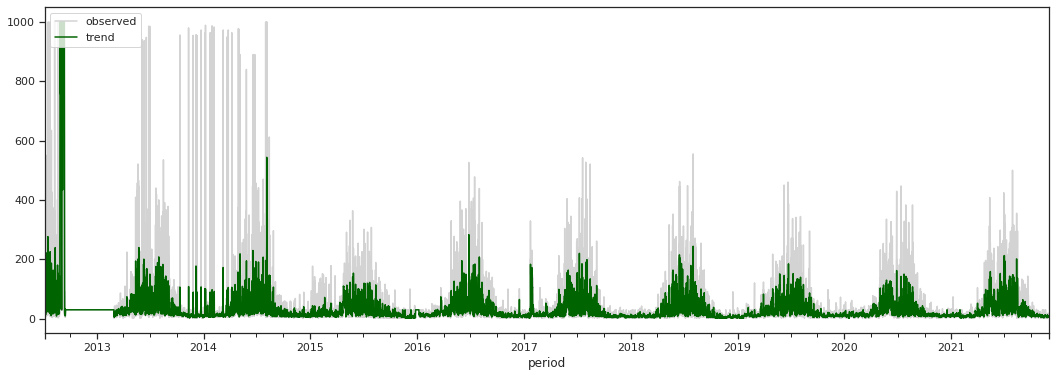

In [243]:
## ahora se realizan los gráficos uno a uno comenzando por la tendencia
fig, ax = plt.subplots(figsize=(18,6))
#grafico original
df.plot(x="period", y="Registros", ax=ax, label="observed", c='lightgrey')
#grafico de la tendencia
trend.plot(ax=ax, label="trend", color="darkgreen") ## si se fijan aquí se está utilizando el objeto 'trend'
plt.legend(loc='upper left')

plt.savefig('images/intro-trend.png');

# The Seasonality

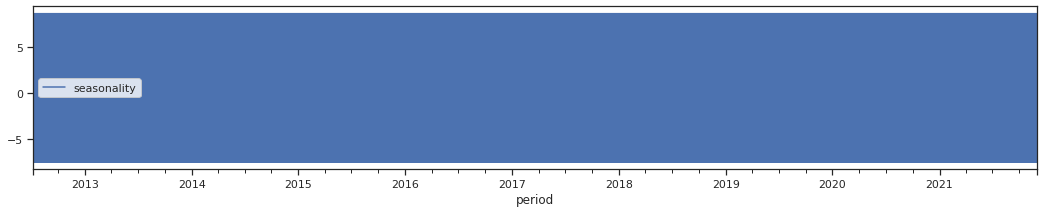

In [268]:
## ahora es el turno de graficar la estacionalidad
fig, ax = plt.subplots(figsize=(18,3)) ## aquí indicamos las proporciones del gráfico, que en este caso se hace un poco más delgados
seasonal.plot(ax=ax, label="seasonality") # aquí se usa el objeto seasonal que se obtuvo los pasos anteriores
plt.legend(loc='bottom left')

plt.savefig('images/intro-seasonality.png');

# The Residual

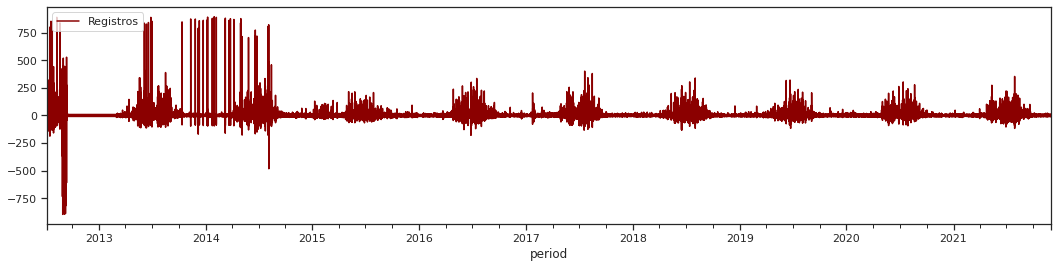

In [250]:
## finalmente gráfica vamos los elementos residuales
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, legend="seasonality", color="darkred") ## Y se utiliza el objeto residual que se obtuvo en la descomposición de la serie
plt.legend(loc='upper left')

plt.savefig('images/intro-residual.png');

In [251]:
# en este bloque se esta haciendo una diferencia entre los datos 
# de entrenamiento y los de validacion 
# Al ser series de tiempo necesitamos tomar bloques continuos 
import numpy as np
#rango de entregamiento hasta el 2015
train_range = df[df.period < '2019-01-01'].index
#rando de validacion desde el 2015 en adelante
test_range = df[(df.period >= '2019-01-01')].index

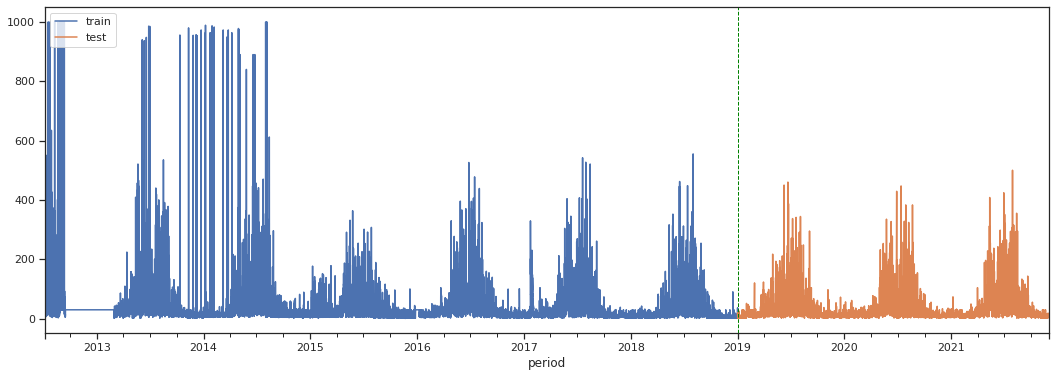

In [252]:
fig, ax = plt.subplots(figsize=(18,6))
#los indices del entregamiento 
df.loc[train_range].plot(x="period", y="Registros", ax=ax, label="train")
#los indices del test de validacion 
df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="test")

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='green', ls='--', lw=1)
plt.legend(loc='upper left')

plt.savefig('images/prophet-split.png'); ## recuerda crear la carpeta images si trabajas con Google Colab

# Facebook Prophet Model

In [253]:
from fbprophet import Prophet

In [256]:
#datos de entrenamiento
df_prophet_train = df.loc[train_range][["period", "Registros"]]
df_prophet_train.columns = ["ds", "y"]
#alimentando el modelo prophet
#consideramos estacionalidad anual, 
model = Prophet(
    yearly_seasonality=True, #verano aire mas limpio
    weekly_seasonality=False, #fds mas contaminados
    daily_seasonality=False, #menos contaminacion a las 15:00-14:00
    #changepoints=list(changepoints.keys()),
    #holidays=df_holidays,
    mcmc_samples=12, #jugar con este valor de frecuencia porque esto esta en 12 meses
    growth='linear',
    interval_width=0.9)

In [257]:
model.fit(df_prophet_train);

To run all diagnostics call pystan.check_hmc_diagnostics(fit)


# Make prediction

In [259]:
#tomamos los datos de test para hacer predicciones sobre esos datos
df_prophet_test = df.loc[test_range][["period", "Registros"]]
df_prophet_test.columns = ["ds", "y"]

#modelo de "forecast" "predict", predice con los datos de test
forecast = model.predict(df_prophet_test[['ds']])
forecast_ci = forecast[['ds', 'yhat_lower', 'yhat_upper']].set_index('ds')

yhat_test = forecast.yhat.values
y_test = df.loc[test_range].Registros.values

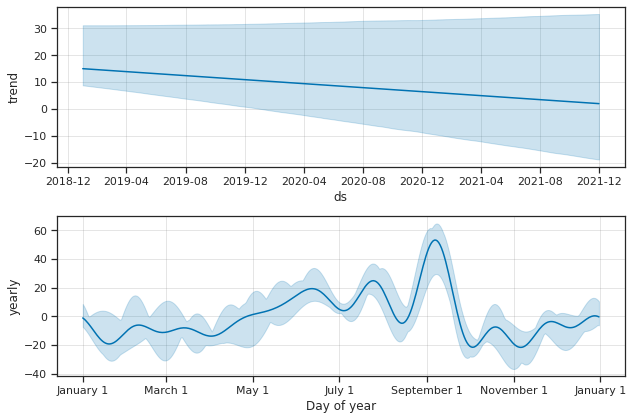

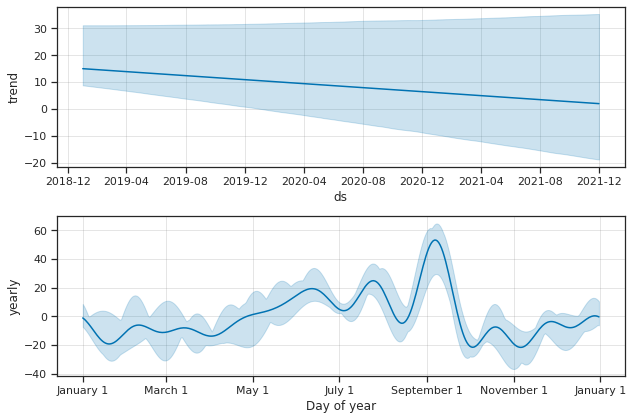

In [260]:
model.plot_components(forecast)

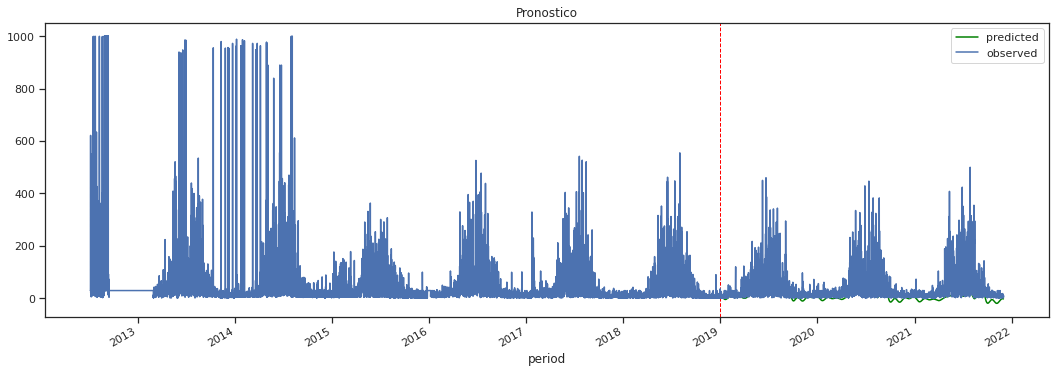

In [263]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="green", label="predicted")

plt.axvline(pd.to_datetime(str(df.loc[test_range].period.values[0])), c='red', ls='--', lw=1)
df.plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Pronostico')

plt.savefig('images/prophet-forecast-testrange.png')
plt.show();

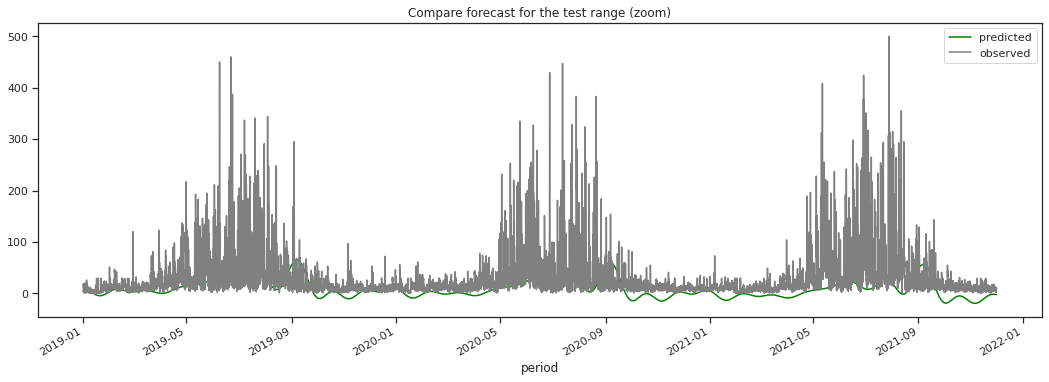

In [264]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="green", label="predicted")

df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed",color="grey")
plt.legend(loc='best')
plt.title('Compare forecast for the test range (zoom)')


plt.savefig('images/prophet-forecast-testrange-zoom.png')
plt.show();

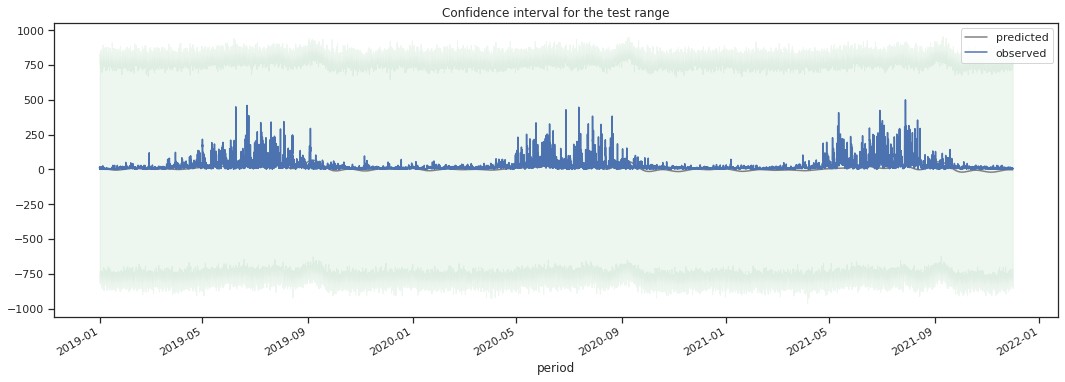

In [265]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range].period.values), yhat_test,
        color="grey", label="predicted")

ax.fill_between(
    forecast_ci.index.to_pydatetime(),
    forecast_ci['yhat_lower'],
    forecast_ci['yhat_upper'],
    color='g',
    alpha=0.1)

df.loc[test_range].plot(x="period", y="Registros", ax=ax, label="observed")

plt.legend(loc='best')
plt.title('Confidence interval for the test range')

plt.savefig('images/prophet-forecast-testrange-confidence-interval.png')
plt.show();

# Evaluate the forecast

In [266]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def theils_u_metric(y_true, y_pred):

  #medidas de desempeño que necesitamos calcular 
    """Calculate Theil's U statistics using observed and predicted vectors."""
    SS_res =  np.mean(np.square(y_true - y_pred))
    SS_true = np.mean(np.square(y_true))
    SS_pred = np.mean(np.square(y_pred))
    
    return np.sqrt(SS_res / (SS_true * SS_pred))

In [267]:
#lo mismo de la teoria pero falta el MAPE el porcetaje de error, 
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2 = r2_score(y_test, yhat_test)
u = theils_u_metric(y_test, yhat_test)

print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2))
print("U   (test): {:0.6f}".format(u))

MAE (test): 22
MSE (test): 1394
R2  (test): -0.203
U   (test): 0.048074
